# **Lab 7: Optimization and Learning**
**Sanskar Gupta**

#**Abstract**
In this report, two iterative methods are implemented to find local minimum for scalar functions

#**Introduction**
Following methods will be implemented in this notebook
 
1)Function: Gradient descent method in Rn 

2)Function: Newton's method in Rn

#**About the code**

In [189]:
# ""This program is a template for lab reports in the course"""
# """DD2363 Methods in Scientific Computing, """
# """KTH Royal Institute of Technology, Stockholm, Sweden."""

# Sanskar Gupta 2021

# Template:
# Copyright (C) 2021 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

#**Environment Setup**

In [190]:
from google.colab import files
 
import time
import numpy as np
 
from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

#**Methods**

##**Gradient Descent**

The gradient descent method aims to iteratively move closer to $x^*$ by stepping in the direction of gradient descent for a particular choice of step length and repeating the interation process for the newly aquired $x$. 

$$
    x^{(k+1)} = x^{(k)} - \alpha^{(k)} \nabla f(x^{(k)})
$$


Gradient of a function can at a point $x$ can be determined using the central difference method.

$$
    \delta_h[f](x) = f(x + h) - f(x - h)/2h
$$
Reference: https://www.mathematik.uni-dortmund.de/~kuzmin/cfdintro/lecture4.pdf

It is to be noted that alpha(step length) is calculated as:
We implement Algorithm 15.1 with step length $\alpha^{(k)}$ satisfying,
$$
f(x^{(k)} - \alpha^{(k)}\nabla f(x^{(k)})) \leq \beta f(x^{(k)}),
$$


In [191]:
def getGradient(function, x):
    h = 1e-4
    gradient = np.zeros(x.size)
    for i in range(gradient.size):
        xPlus = x.copy()
        xMinus = x.copy()
        xPlus[i]= xPlus[i]+h
        xMinus[i]= xMinus[i]-h
        gradient[i] = (function(xPlus)-function(xMinus)) / (2*h)
    return gradient

In [192]:
 def getStepLength(f, Df, x, beta=.02):
  alpha = 0.99 # Last possible value of alpha
  fx = f(x)
  factor = 0.70
  while f(x - alpha * Df) >= beta * fx and alpha > 0.005:
    alpha = alpha * factor
  return alpha

In [193]:
def gradient_descent_constant_alpha(f, x0, tol = 0.001):
  x = x0
  xs = np.matrix(x0)
  Df = getGradient(f,x)
  while np.linalg.norm(Df) > tol:
    Df = getGradient(f,x)
    alpha = 1e-4
    x = x - alpha*Df
    xs = np.concatenate((xs,np.matrix(x)), axis = 0)
  return x, xs

In [194]:
def gradient_descent(f, x0, tol = 0.001):
  x = x0
  xs = np.matrix(x0)
  Df = getGradient(f,x)
  j=0
  while np.linalg.norm(Df) > tol:
    Df = getGradient(f,x)
    alpha = choose_step(f, Df,x)
    # alpha = 1e-4
    x = x - alpha*Df
    xs = np.concatenate((xs,np.matrix(x)), axis = 0)
    j=j+1
  return x, xs

In [195]:
def testGradientDescentConstantAlpha():  
  f = lambda x: ((x[0]**2 + x[1]**2)/2)
  
  n = 100
  X = np.array(np.linspace(-3,3,n))
  Y = np.array(np.linspace(-3,3,n))
  Z = np.zeros([n,n])
  
  x, xs = gradient_descent_constant_alpha(f, np.array([1,2.5]), 1e-10)
  
  for i in range(n):
    for j in range(n):
      Z[i,j] = f([X[j],Y[i]])
  
  fig = plt.figure()

  sub = fig.add_subplot(111)
  sub.set_xlim(-3,3)
  sub.set_ylim(-3,3)
  CS = sub.contour(X,Y,Z, 15)
  sub.plot(xs[:,0],xs[:,1], 'o-')
  print('output:',x)
  print('target:', [0, 0])
  print('gradient:',np.linalg.norm(getGradient(f,x)))
 
# more time with constant alpha

In [196]:
def testGradientDescentDynamicAlpha():  
  f = lambda x: ((x[0]**2 + x[1]**2)/2)

  n = 100
  X = np.array(np.linspace(-3,3,n))
  Y = np.array(np.linspace(-3,3,n))
  Z = np.zeros([n,n])
  
  x, xs = gradient_descent(f, np.array([1,2.5]), 1e-10)
  
  for i in range(n):
    for j in range(n):
      Z[i,j] = f([X[j],Y[i]])
  
  fig = plt.figure()

  sub = fig.add_subplot(111)
  sub.set_xlim(-3,3)
  sub.set_ylim(-3,3)
  CS = sub.contour(X,Y,Z, 15)
  sub.plot(xs[:,0],xs[:,1], 'o-')
  print('output:',x)
  print('target:', [0, 0])
  print('||gradient||:',np.linalg.norm(getGradient(f,x)))
  
  
  x_min = np.array([0,0])
  N1 = len(xs)
  error_grad = np.zeros(N1)
  for i in range(N1):
    error_grad[i] = np.linalg.norm(xs[i] - x_min)
  plt.figure(figsize=(10,8))
  plt.title("Error convergence for gradient descent")
  plt.plot(error_grad, "-r", label="Error convergence", color='blue')
  plt.legend(loc="upper right")
  plt.show()

##**Newton's Method**
In Newton's method, the stepping criteria is instead $x^{(k+1)} = x^{(k)} + \triangle x^{(k)}$, where we get $\triangle x^{(k)}$ by solving the following equation: $Hf(x^{(k)}) \triangle x^{(k)} = -\bigtriangledown f(x^{(k)})$ where the Hessian is given by $H_{i,j} = \frac{\delta ^2 f}{\delta x_i \delta x_j}$

Source: Lecture notes

To get the Hessian matrix the following link is referred
https://www.mathematik.uni-dortmund.de/~kuzmin/cfdintro/lecture4.pdf 

$\bigtriangledown f(x) = \frac{f(x+\triangle x) - f(x-\triangle x)}{2  \triangle x} $

$H_{i,j} = \frac{f(x+\triangle x_i + \triangle x _j) - f(x+\triangle x_i - \triangle x _j) - f(x - \triangle x_i + \triangle x _j) + f(x - \triangle x_i - \triangle x _j)}{4 \triangle x_i \triangle x_j}$

In [197]:

def getIndividualTerms(x):
    xPlusPlus = x.copy()
    xPlusMinus = x.copy()
    xMinusPlus = x.copy()
    xMinusMinus = x.copy()
    return xPlusPlus, xPlusMinus, xMinusPlus, xMinusMinus
    
def  getHessianMatrix(function, x):
  h = 1e-5
  N = x.size
  hessianMatrix = np.zeros(shape=(N,N))
  for i in range(N):
    for j in range(N):
      xPlusPlus , xPlusMinus, xMinusPlus, xMinusMinus=getIndividualTerms(x)    
      xPlusPlus[i] = xPlusPlus[i]+ h
      xPlusPlus[j] = xPlusPlus[j]+ h
     
      xPlusMinus[i] = xPlusMinus[i]+ h
      xPlusMinus[j] = xPlusMinus[j] - h
    
      xMinusPlus[i] = xMinusPlus[i] - h
      xMinusPlus[j] =  xMinusPlus[j] + h
      
      xMinusMinus[i] = xMinusMinus[i] - h
      xMinusMinus[j] =  xMinusMinus[j] - h
      hessianMatrix[i,j] = (function(xPlusPlus) - function(xPlusMinus) - function(xMinusPlus) + function(xMinusMinus)) / (4*h*h) 

  return hessianMatrix



def newtonsMethodForGradientDescent(f, x0, TOL):
  x = []
  x.append(x0)
  Df = getGradient(f, x[-1])

  while np.linalg.norm(Df) > TOL:
    Df = getGradient(f, x[-1])
    Hf = getHessianMatrix(f, x[-1])
    dx = np.linalg.solve(Hf, -Df)
    x.append(x[-1] + dx)
  
  return x

In [198]:
def testNewtonMethod():  
  f = lambda x : (x[0]-.1)**2 + (x[1]-0.2)**2
  x0 = np.array([0.5, 0.5])
  TOL = 1e-5
  x_newtons = newtonsMethodForGradientDescent(f, x0, TOL)
  x_min = np.array([0.1,0.2])
  N2 = len(x_newtons)
  error_newton = np.zeros(N2)
  for i in range(N2):
    error_newton[i] = np.linalg.norm(x_newtons[i] - x_min)
  plt.figure(figsize=(10,8))
  plt.title("Error convergence for Newton's's method")
  plt.plot(error_newton, "-r", label="Error convergence", color='blue')
  plt.legend(loc="upper right")
  plt.show()

#**Results**


output: [3.71335276e-11 9.28338190e-11]
target: [0, 0]
gradient: 9.998508304488345e-11
output: [2.75535566e-11 6.88838915e-11]
target: [0, 0]
||gradient||: 7.419022171271693e-11


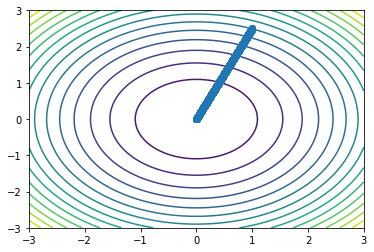

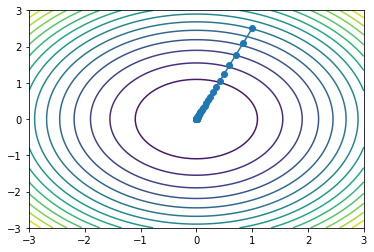

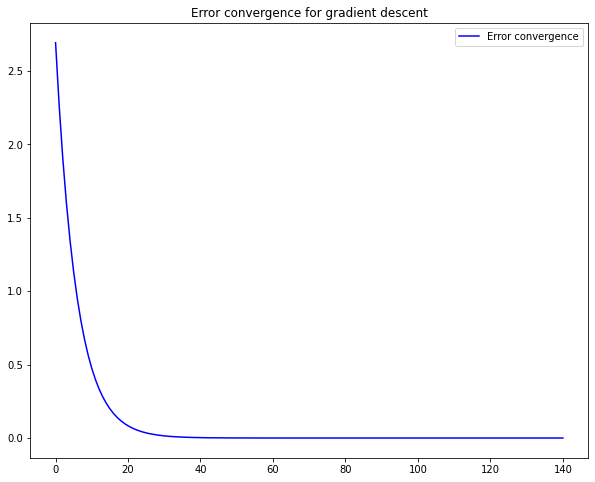

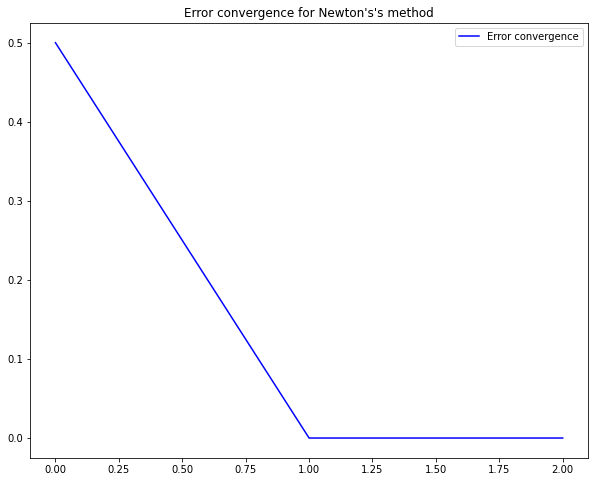

In [199]:
testGradientDescentConstantAlpha()
testGradientDescentDynamicAlpha()
testNewtonMethod()

#**Discussion**
For gradient descent it was observed that keeping alpha (learning rate) constant increases the time of convergence of algorithm , so its always better to have a dynamic learning rate
 
Newton's method also seems to converge but in a linear fashion upto a certain point , after that error becomes zero.